<a href="https://colab.research.google.com/github/AmeliaAgustin17/Kode-Produk-Elektronik/blob/main/Produk_Elektronik_Amelia_Agustin_4101421061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Menampilkan tipe data dan cek missing vallue


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Pemanggilan data
data = pd.read_csv("/content/produk_elektronik.csv")

In [4]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [5]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [6]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 550 baris. Akan tetapi terdapat beberapa kolom yang memiliki baris < 550, maka akan dilakukan proses identifikasi lebih lanjut


In [8]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [9]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/N/A(Python:nan atau NaN)) adalah kolom harga, rating, jumlah ulasan

## 2. Cek Missing value, jumlah missing value, serta Metode Penanganan Missing Value

In [27]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [10]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

Missing Values dapat memengaruhi analisis data dalam berbagai cara. Jika terlalu banyak data yang hilang, hasil analisis bisa menjadi bias dan kurang akurat. Selain itu, banyak algoritma machine learning tidak bisa menangani missing values secara langsung, sehingga model yang dibangun bisa mengalami error atau tidak bekerja dengan optimal. Dalam analisis statistik, keberadaan missing values juga dapat menyebabkan interpretasi yang salah karena data yang tidak lengkap dapat memberikan gambaran yang tidak mewakili populasi sebenarnya.


## Penanganan Missing Vallue

Untuk menangani missing values, ada beberapa metode yang bisa digunakan, tergantung pada karakteristik data. Jika hanya sedikit data yang hilang, missing values bisa dihapus agar tidak memengaruhi analisis secara signifikan. Jika jumlah missing values cukup banyak, alternatif lain adalah mengganti nilai yang hilang dengan median, mean, atau modus dari kolom yang bersangkutan. Jika data yang hilang memiliki pola tertentu, teknik imputasi yang lebih canggih seperti regresi atau algoritma machine learning dapat digunakan.

## Missing Harga

In [11]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [12]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

Bedasarkan output tersebut, dapat kita lihat bahwa pada kolom harga mengandung 30 missing value.
Harga adalah nilai atau jumlah uang yang harus dibayarkan untuk memperoleh atau membeli suatu produk. Harga barang elektronik seringkali memiliki rentang yang luas, dari produk murah hingga yang sangat mahal. Ini bisa menyebabkan distribusi data menjadi miring (skewed) ke kanan, di mana sebagian besar harga lebih rendah tetapi ada beberapa produk dengan harga yang sangat tinggi.

Jika terdapat produk dengan harga yang jauh lebih tinggi dari rata-rata (misalnya barang premium atau edisi khusus), maka nilai mean akan menjadi terlalu tinggi dan tidak mewakili mayoritas data.

Median adalah nilai tengah dalam distribusi data, sehingga tidak terpengaruh oleh nilai ekstrem. Dengan menggunakan median, nilai yang digunakan untuk menggantikan missing values tetap mencerminkan kondisi mayoritas produk tanpa dipengaruhi oleh harga yang sangat tinggi atau sangat rendah.

In [14]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].median())

In [15]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

## Missing Rating

In [16]:
#melihat isi dalam kolom rating
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [17]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan rata-rata dari durasi keseluruhan data.

Rating adalah penilaian atau evaluasi yang diberikan kepada sebuah produk, layanan, atau kinerja berdasarkan kualitas, peforma, atau kepuasan. Rating produk biasanya diberikan dalam skala terbatas, misalnya 1-5 atau 1-10 yang cenderung membentuk distribusi normal atau mendekati normal.
Jika rating diisi dengan median, bisa jadi kehilangan variasi kecil dalam data yang mungkin relevan untuk analisis pengguna. Mean tetap mempertahankan keseimbangan nilai rating dalam dataset.

Karena rating biasanya berada dalam rentang terbatas (misalnya 1-5 atau 1-10), tidak ada nilai yang terlalu jauh dari nilai lainnya. Oleh karena itu, mean tetap representatif dalam menggantikan missing values.

In [20]:
#Mengisi missing value
data['rating']=data['rating'].fillna(data['rating'].mean())

In [21]:
#Jumlah missing value
np.sum(data['rating'].isnull())

0

## Missing jumlah_ulasan

In [22]:
#melihat isi dalam kolom jumlah_ulasan
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [23]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

**Analisis awal**

Jumlah ulasan (jumlah pelanggan yang memberikan review) sering kali sangat bervariasi antar produk. Beberapa produk sangat populer dan memiliki ribuan ulasan, sementara produk lain mungkin hanya memiliki beberapa ulasan.

Distribusi jumlah ulasan sering skewed ke kanan, karena sebagian besar produk memiliki sedikit ulasan, tetapi ada beberapa produk dengan jumlah ulasan yang sangat tinggi (outlier) (misal produk populer vs. produk baru yang jarang dibeli).

Dalam situasi ini, mean tidak akan mewakili sebagian besar data karena ditarik ke atas oleh produk dengan banyak ulasan.Jika menggunakan mean, nilai pengganti akan terlalu tinggi karena adanya beberapa produk dengan ulasan sangat banyak.
Dengan menggunakan median, kita mendapatkan nilai tengah yang lebih mewakili sebagian besar produk. Karena median lebih tahan terhadap outlier, sehingga tidak dipengaruhi oleh beberapa produk yang memiliki jumlah ulasan sangat tinggi dan median juga memberikan estimasi yang lebih representatif untuk produk dengan jumlah ulasan yang lebih sedikit.

In [25]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [26]:
#Jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

0

## 3. Identifikasi Outlier dalam dataset, Metode Penanganan

Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:


1.   Boxplot → Visualisasi distribusi dan outlier
2.   Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil



**Menggunakan Boxplot**

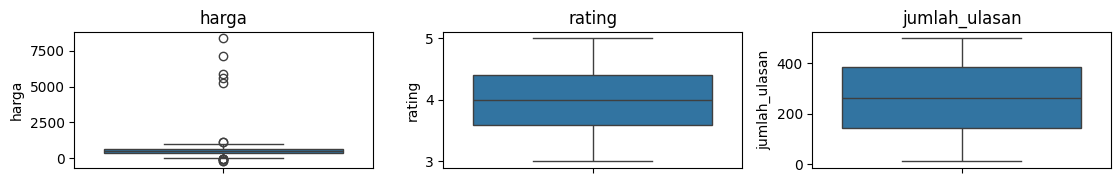

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Untuk lebih detail atau jelasnya sebagai berikut

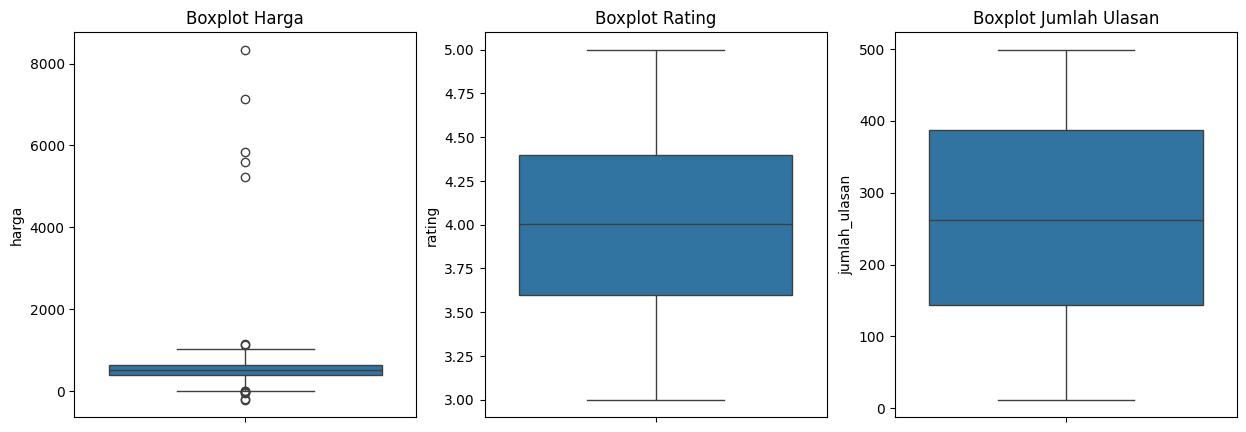

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Membuat boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 5))

# Boxplot untuk harga
plt.subplot(1, 3, 1)
sns.boxplot(y=data["harga"])
plt.title("Boxplot Harga")

# Boxplot untuk rating
plt.subplot(1, 3, 2)
sns.boxplot(y=data["rating"])
plt.title("Boxplot Rating")

# Boxplot untuk jumlah ulasan
plt.subplot(1, 3, 3)
sns.boxplot(y=data["jumlah_ulasan"])
plt.title("Boxplot Jumlah Ulasan")

plt.show()

**menggunakan IQR**

In [31]:
#Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

#Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


**Dampak Outlier terhadap Analisis Data**
Outlier adalah data yang memiliki nilai yang sangat berbeda dari nilai-nilai lainnya dalam dataset. Dampak outlier terhadap analisis data dapat sangat signifikan, baik positif maupun negatif. Berikut beberapa dampak outlier terhadap analisis data:

**Dampak Negatif**

*   Outlier dapat membuat model prediksi menjadi tidak akurat, karena model tersebut dapat dipengaruhi oleh nilai-nilai yang tidak biasa.

*   Outlier dapat mengubah hasil analisis seperti mengubah nilai rata-rata, median, atau standar deviasi.
*   Outlier dapat membuat visualisasi data menjadi tidak jelas atau tidak akurat.

*   Outlier dapat membuat analis meragukan hasil analisis mereka.

**Dampak Positif**


*   Outlier dapat membantu mengidentifikasi kesalahan data, seperti kesalahan pengukuran atau kesalahan penginputan.
*   Outlier dapat membantu mengidentifikasi pola yang tidak biasa dalam data, yang dapat menjadi penting dalam analisis.

*   Outlier dapat membantu mengembangkan model yang lebih baik dengan mempertimbangkan nilai-nilai yang tidak biasa.

**Dampak Outlier pada analisis ini**


*   Outlier dapat menyebabkan nilai mean menjadi bias, terutama pada data harga.
*   Model regresi dan clustering sangat sensitif terhadap outlier.
*   Jika tidak ditangani, hasil analisis bisa menjadi tidak representatif.






In [32]:
#Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

#Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


**Penanganan Outlier**
Beberapa metode umum untuk menangani outlier adalah:

*   Menghapus outlier jika jumlahnya sedikit dan tidak terlalu berdampak pada dataset.
*   Menggunakan Winsorizing dengan membatasi nilai outlier ke dalam range tertentu.
*   Menggunakan transformasi log untuk menormalkan distribusi.

Pada permasalahan dan analisis ini, kita akan:


*   Menghapus outlier harga yang negatif, karena nilai harga tidak mungkin negatif.
*   Menggunakan Winsorizing untuk membatasi harga yang terlalu tinggi.




In [39]:
#Menghapus harga negatif
data[data["harga"] >= 0]

#winzoring untuk membatasi harga yang terlalu tinggi
def winzoring(data, column, batas_atas):
    Q1= data[column].quantile(0.25)
    Q3= data[column].quantile(0.75)
    IQR= Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column]= np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > batas_atas, batas_atas, data[column])
    return data

#terapkan winzoring
for col in num_cols:
    data = winzoring(data, col, data[col].quantile(0.95))

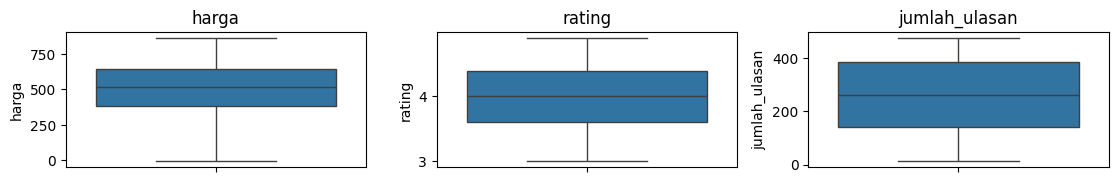

In [40]:
#cek boxplot lagi
num_cols = ['harga', 'rating', 'jumlah_ulasan']

#visualisasi boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

## 4. Encoding, dan Metode Encoding

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning. Model Machine Learning umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.



**Metode Encoding** dalam Machine Learning Ada beberapa metode encoding yang umum digunakan, tergantung pada jenis dan karakteristik data kategorik:

1.   
One-Hot Encoding (OHE): Mengubah kategori menjadi beberapa kolom biner (0/Digunakan jika jumlah kategori tidak

2.   Ordinal Encoding : Mengubah kategori menjadi angka berurutan (0,1,2,..). Digunakan jika kategori memiliki urutan yang jelas (misalnya pendidikan: SD < SMP < SMA)
3.   Target Encoding : Menggunakan rata-rata target (misalnya rata-rata skor IMDB berdasarkan negara) untuk mengganti kategori. Digunakan jika data memiliki hubungan statistik yang kuat dengan target.


Dalam penyelesaian ini, kita akan melakukan encoding pada kolom kategorikal dalam dataset. Dengan langkah-langkah sebagai berikut:


1.   Menentukan kolom mana yang memerlukan encoding.
2.   Membandingkan berbagai metode encoding
3.   Memilih metode encoding yang paling sesuai untuk setiap kolom dan menjelaskan alasannya.
4.   Menerapkan metode encoding pada dataset.



In [41]:
#melihat isi dalam kolom
data['nama_produk'].unique()

array(['Produk_1', 'Produk_2', 'Produk_3', 'Produk_4', 'Produk_5',
       'Produk_6', 'Produk_7', 'Produk_8', 'Produk_9', 'Produk_10',
       'Produk_11', 'Produk_12', 'Produk_13', 'Produk_14', 'Produk_15',
       'Produk_16', 'Produk_17', 'Produk_18', 'Produk_19', 'Produk_20',
       'Produk_21', 'Produk_22', 'Produk_23', 'Produk_24', 'Produk_25',
       'Produk_26', 'Produk_27', 'Produk_28', 'Produk_29', 'Produk_30',
       'Produk_31', 'Produk_32', 'Produk_33', 'Produk_34', 'Produk_35',
       'Produk_36', 'Produk_37', 'Produk_38', 'Produk_39', 'Produk_40',
       'Produk_41', 'Produk_42', 'Produk_43', 'Produk_44', 'Produk_45',
       'Produk_46', 'Produk_47', 'Produk_48', 'Produk_49', 'Produk_50',
       'Produk_51', 'Produk_52', 'Produk_53', 'Produk_54', 'Produk_55',
       'Produk_56', 'Produk_57', 'Produk_58', 'Produk_59', 'Produk_60',
       'Produk_61', 'Produk_62', 'Produk_63', 'Produk_64', 'Produk_65',
       'Produk_66', 'Produk_67', 'Produk_68', 'Produk_69', 'Produk_70',
 

Untuk kolom kategori dan negara_asal akan menggunakan One-Hot Encoding.
Kolom kategori menggunakan One-Hot Encoding karena jenis produk seperti "Laptop", "Handphone", "Aksesoris", dan lainnya tidak memiliki urutan atau hierarki tertentu, sehingga representasi numerik dengan Label Encoding bisa menyebabkan kesalahan interpretasi oleh model. Dengan One-Hot Encoding, setiap kategori memiliki kolom sendiri dengan nilai biner (0 atau 1), yang lebih sesuai untuk kategori yang tidak memiliki hubungan ordinal.

Kolom negara_asal menggunakan Label Encoding karena jumlah kategorinya sedikit dan tidak terlalu memengaruhi interpretasi data. Dengan hanya tiga negara seperti "China", "USA", dan "Jepang", representasi numerik lebih efisien dibandingkan One-Hot Encoding, yang akan menghasilkan tiga kolom tambahan dan meningkatkan dimensi dataset tanpa manfaat yang signifikan.

**Kategori**

In [ ]:
data['jenis']=data['kategori']
data=pd.get_dummies(data, columns=['jenis'], prefix='jenis')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   negara_asal      11 non-null     object
 1   benua_Asia       11 non-null     bool  
 2   benua_Australia  11 non-null     bool  
 3   benua_Europe     11 non-null     bool  
 4   benua_Others     11 non-null     bool  
 5   benua_America    11 non-null     bool  
 6   benua_Asia       11 non-null     bool  
 7   benua_Australia  11 non-null     bool  
 8   benua_Europe     11 non-null     bool  
 9   benua_Others     11 non-null     bool  
 10  benua_America    11 non-null     bool  
 11  benua_Asia       11 non-null     bool  
 12  benua_Australia  11 non-null     bool  
 13  benua_Europe     11 non-null     bool  
 14  benua_Others     11 non-null     bool  
dtypes: bool(14), object(1)
memory usage: 374.0+ bytes


**negara_asal ke benua**

In [84]:
# Buat dictionary untuk mapping negara ke benua
negara_asal_to_benua = {
    'China': 'Asia',
    'USA': 'America',
    'India': 'Asia',
    'Canada': 'America',
    'Australia': 'Australia',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Taiwan': 'Asia',
    'UK': 'Europe'
}

# Ubah negara menjadi region (benua)
data['benua'] = data['negara_asal'].map(negara_asal_to_benua).fillna('Others')

# One-Hot Encoding pada benua, bukan negara_asal
data = pd.get_dummies(data, columns=['benua'], prefix='benua')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   negara_asal      11 non-null     object
 1   benua_Asia       11 non-null     bool  
 2   benua_Australia  11 non-null     bool  
 3   benua_Europe     11 non-null     bool  
 4   benua_Others     11 non-null     bool  
 5   benua_America    11 non-null     bool  
 6   benua_Asia       11 non-null     bool  
 7   benua_Australia  11 non-null     bool  
 8   benua_Europe     11 non-null     bool  
 9   benua_Others     11 non-null     bool  
 10  benua_America    11 non-null     bool  
 11  benua_Asia       11 non-null     bool  
 12  benua_Australia  11 non-null     bool  
 13  benua_Europe     11 non-null     bool  
 14  benua_Others     11 non-null     bool  
dtypes: bool(14), object(1)
memory usage: 374.0+ bytes
